In [12]:
from dataset import ASODataset
from graph_fn import onehot_reactant_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [13]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 30
NODE_HIDDEN_SIZE = 60
GLOB_VEC_SIZE = 10
EPOCHS = 50
DROP_OUT = 0
BOND_ATTR = 5

In [14]:
a = ASODataset(onehot_reactant_batch)
train_data, val_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

In [15]:
device = torch.device('cuda')
model = GNNModel(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, GLOB_VEC_SIZE, num_layers=2, dp_rate=DROP_OUT)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.95)

Epoch: 001, Train Loss: 0.5030, Test Loss: 0.5290, Train MSE: 0.0203, Test MSE: 0.0234, , Train R2: 0.1179, Test R2: 0.0883
Epoch: 002, Train Loss: 0.5009, Test Loss: 0.5292, Train MSE: 0.0195, Test MSE: 0.0235, , Train R2: 0.1523, Test R2: 0.0848
Epoch: 003, Train Loss: 0.4946, Test Loss: 0.5309, Train MSE: 0.0176, Test MSE: 0.0238, , Train R2: 0.2342, Test R2: 0.0725
Epoch: 004, Train Loss: 0.4943, Test Loss: 0.5276, Train MSE: 0.0175, Test MSE: 0.0230, , Train R2: 0.2421, Test R2: 0.1055
Epoch: 005, Train Loss: 0.4915, Test Loss: 0.5238, Train MSE: 0.0166, Test MSE: 0.0216, , Train R2: 0.2814, Test R2: 0.1572
Epoch: 006, Train Loss: 0.4920, Test Loss: 0.5276, Train MSE: 0.0170, Test MSE: 0.0227, , Train R2: 0.2617, Test R2: 0.1157
Epoch: 007, Train Loss: 0.4822, Test Loss: 0.5117, Train MSE: 0.0135, Test MSE: 0.0175, , Train R2: 0.4141, Test R2: 0.3165
Epoch: 008, Train Loss: 0.4739, Test Loss: 0.5010, Train MSE: 0.0109, Test MSE: 0.0139, , Train R2: 0.5262, Test R2: 0.4590
Epoch: 0

array([0.45075256, 0.00296104, 0.87152911, 0.47352985, 0.00404411,
       0.84245519])

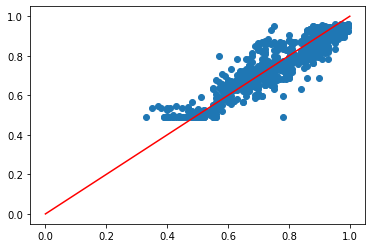

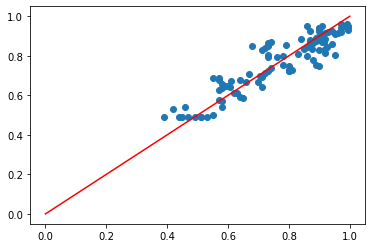

In [16]:
t = Trainer(model, device, optimizer, scheduler, glob_v= True)
t.train(train_loader, val_loader, nn.BCELoss, EPOCHS)